In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mp_api.client import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator


In [94]:
mp_key = "saKvn4nYOR6knw5q6WoAxtMKCsoAG1gq"
mp_id = "mp-561586"

In [95]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    parser = CifWriter(prim_struc)
    parser.write_file('mystructure.cif')
conv_structure = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()    

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Dans ce devoir, il s'agit de déterminer les trois premiers pics du diffractogramme correspondant à notre cristal. Pour chacun de ces pics, il faudra préciser les indices hkl qui leur sont associés. Nous considérerons un rayonnement X incident Cu Kα de longueur d’onde λ = 1.54060 Å.

Ces rayons X engendrent des phénomènes d’interférences constructives ou destructives en fonction de leurs interactions avec le réseau cristallin. L’interférence est constructive uniquement si le vecteur d’onde k appartient au plan de Bragg.

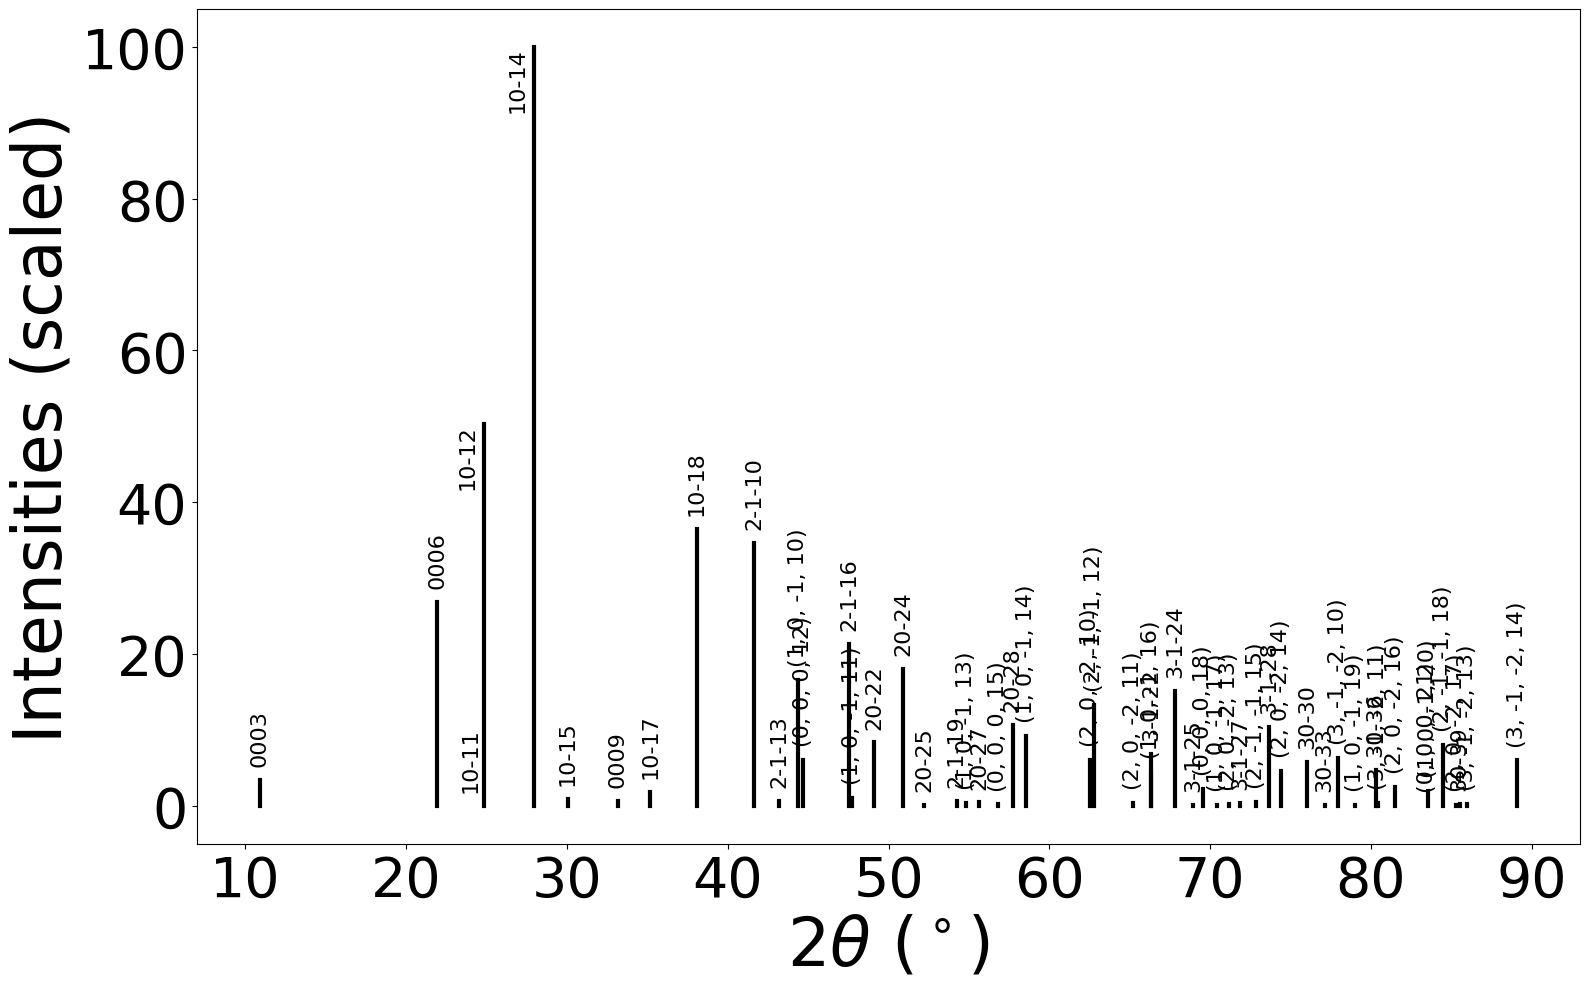

In [96]:

XRD = XRDCalculator(1.54060) 
XRD.get_plot(conv_structure) # j'utilise une structure pour pouvoir comparer avec Matérial Project
pattern = XRD.get_pattern(conv_structure)

Premier pics

In [97]:
theta2 = pattern.x[0]
intensité = pattern.y[0]
indices_hkl = pattern.hkls[0][0].get("hkl")
multiplicité = pattern.hkls[0][0].get("multiplicity")

print("- Angle 2θ: " + str(theta2) +"°\n")
print("- Intensité relative du pic ( échelle de 0 à 100): " +str(intensité) +"\n")
print("- Les indices (h,k,l) sont " + str(indices_hkl)  +"\n\n" )
print("- De multiplicité " + str(multiplicité) +"\n\n")

- Angle 2θ: 10.91313479202713°

- Intensité relative du pic ( échelle de 0 à 100): 3.3826389364637643

- Les indices (h,k,l) sont (0, 0, 0, 3)


- De multiplicité 2




Deuxième pics 

In [98]:
theta2 = pattern.x[1]
intensité = pattern.y[1]
indices_hkl = pattern.hkls[1][0].get("hkl")
multiplicité = pattern.hkls[1][0].get("multiplicity")

print("- Angle 2θ: " + str(theta2) +"°\n")
print("- Intensité relative du pic (échelle de 0 à 100): " +str(intensité) +"\n")
print("- Les indices (h,k,l) sont " + str(indices_hkl) +"\n\n")
print("- De multiplicité " + str(multiplicité) +"\n\n")

- Angle 2θ: 21.92685177906422°

- Intensité relative du pic (échelle de 0 à 100): 26.851088842399953

- Les indices (h,k,l) sont (0, 0, 0, 6)


- De multiplicité 2




Troisième pics 

In [99]:
theta2 = pattern.x[2]
intensité = pattern.y[2]
indices_hkl = pattern.hkls[2][0].get("hkl")
multiplicité = pattern.hkls[2][0].get("multiplicity")
print("- Angle 2θ: " + str(theta2) +"°\n")
print("- Intensité relative du pic (échelle de 0 à 100): " +str(intensité) +"\n")
print("- Les indices (h,k,l) sont " + str(indices_hkl) +"\n\n")
print("- De multiplicité " + str(multiplicité) +"\n\n")

- Angle 2θ: 23.982060205309594°

- Intensité relative du pic (échelle de 0 à 100): 0.010037840491366704

- Les indices (h,k,l) sont (1, 0, -1, 1)


- De multiplicité 12




En résumé 

Pic 1:
- Angle 2θ: 10.91°
- Intensité relative: 3.38
- Indices (hkl): (0, 0, 0, 3)

Pic 2:
- Angle 2θ: 21.93°
- Intensité relative: 26.85
- Indices (hkl): (0, 0, 0, 6)

Pic 3:
- Angle 2θ: 23.98°
- Intensité relative: 0.01
- Indices (hkl): (1, 0, -1, 1)



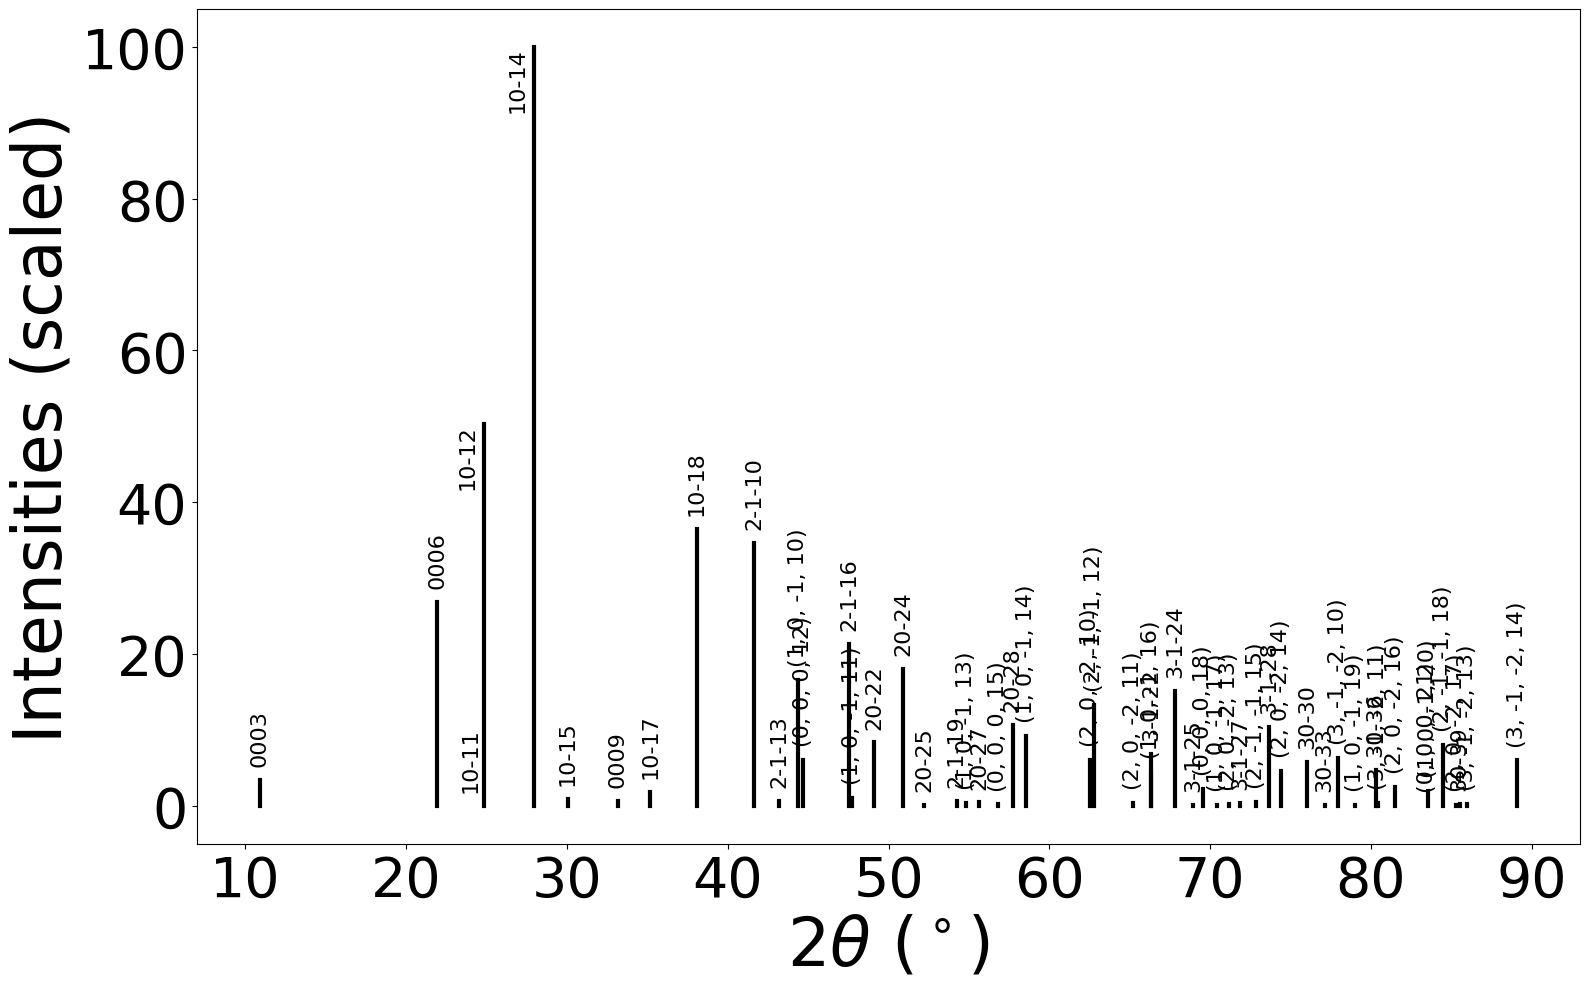

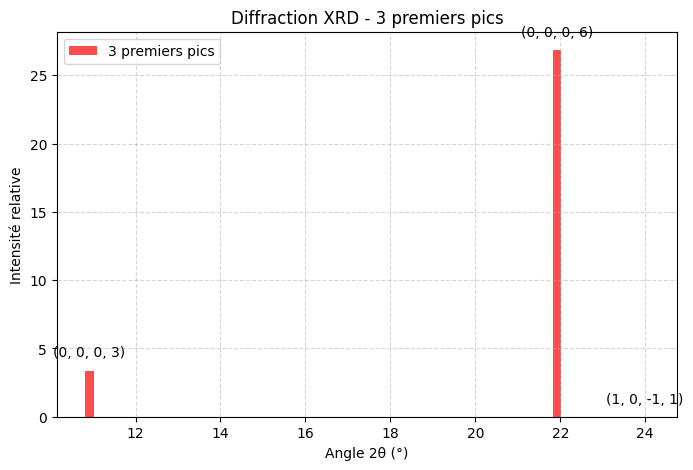

In [100]:
XRD = XRDCalculator(1.54060) 
XRD.get_plot(conv_structure) # j'utilise une structure pour pouvoir comparer avec Matérial Project
pattern = XRD.get_pattern(conv_structure)
angles_2theta = pattern.x[:3]
intensities = pattern.y[:3]
indices_hkl = [hkl[0]["hkl"] for hkl in pattern.hkls[:3]]
for i in range(3):
    print(f"Pic {i+1}:")
    print(f"- Angle 2θ: {angles_2theta[i]:.2f}°")
    print(f"- Intensité relative: {intensities[i]:.2f}")
    print(f"- Indices (hkl): {indices_hkl[i]}\n")
plt.figure(figsize=(8, 5))
plt.bar(angles_2theta, intensities, width=0.2, color='r', alpha=0.7, label="3 premiers pics")
for i in range(3):
    plt.text(angles_2theta[i], intensities[i] + 1, str(indices_hkl[i]), ha='center', fontsize=10)
plt.xlabel("Angle 2θ (°)")
plt.ylabel("Intensité relative")
plt.title("Diffraction XRD - 3 premiers pics")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()